# ML Tutorial Day 14

## Naive Bayes Classifier 1

When we flip a coin, we know the probability of getting either head or tail is 0.5. It is shown mathematically in the following way:

$$
\text{P}(\text{Toss} = Head) = \frac{1}{2}
$$

Similarly, if you draw a random card from a well shuffled deck, then the probability that you will pick a diamond card is given as following:

$$
\text{P}(\text{Draw} = Diamond) = \frac{13}{52} = \frac{1}{4}
$$

Now if you draw a card and you know that it is diamonds, then what is the probability that it is a queen?
Such scenarios are dealt with using conditional probability which is shwon in the following way:

$$
\text{P}(\text{Draw} = Queen | Diamond) = \frac{13}{52} * \frac{1}{13} = \frac{1}{13}
$$

This is read as:

$$
\text{P}(\text{A|B}) = \text{Probability of event A knowing that event B has occured}
$$

The formula of finding $ \text{P}(\text{A|B}) $ is given as:

$$
\text{P(A|B)} = \frac{\text{P(B|A)}*\text{P(A)}}{\text{P(B)}}
$$

We have the Titanic dataset, and we can calculate the survival chances given some other parameters:

$$
\text{P} \left( \frac{\text{Survived}}{\text{Male and Class and Age and Cabin and Fare}} \right)
$$

The method is called Naïve because we make the assumption that features like `Male`, `Class`, etc., are independent of each other, while in reality some of the features can be related.

In [124]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [125]:
# we see not all data is relevant for us, so we will drop those columns
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [126]:
# preprocessing the data
target = df['Survived']
inputs = df.drop(['Survived'], axis = 1)

inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [127]:
# sex column is text, so we need to change it using one hot encoding
dummies = pd.get_dummies(inputs['Sex'], dtype = int)
dummies.head()
inputs = pd.concat([inputs, dummies], axis = 1)
inputs.drop(['Sex'], axis = 1, inplace = True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [128]:
# finding is any columns has NA values
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [129]:
# filling the NA values in Age column
inputs['Age'] = inputs['Age'].fillna(int(inputs['Age'].mean()))
inputs.head(20)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,29.0,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [130]:
# creating the training and testing datasets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(inputs, target, test_size = 0.2)

X_train

,Pclass,Age,Fare,female,male
598,3,29.0,7.2250,0,1
729,3,25.0,7.9250,1,0
735,3,28.5,16.1000,0,1
673,2,31.0,13.0000,0,1
481,2,29.0,0.0000,0,1
...,...,...,...,...,...
353,3,25.0,17.8000,0,1
427,2,19.0,26.0000,1,0
393,1,23.0,113.2750,1,0
61,1,38.0,80.0000,1,0


In [131]:
# training the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [132]:
# testing the model
model.score(X_test, y_test)

0.7932960893854749

Text(50.722222222222214, 0.5, 'Truth')

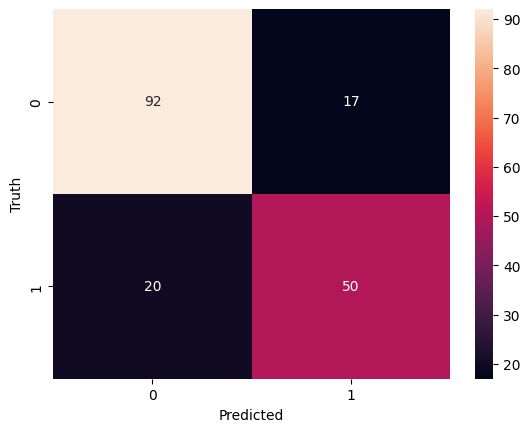

In [133]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_predicted = model.predict(X_test)
confm = confusion_matrix(y_predicted, y_test)

sn.heatmap(confm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Naive Bayes Classifier 2

We have a dataset with emails labeled as either spam or not. We want to segregate them and predict if a new email is spam or not.

In [134]:
# loading the dataset
import pandas as pd

df = pd.read_csv('spam.csv')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [135]:
# understanding the dataset

# grouping the dataset by category
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

We have to convert our data into numbers because ML algorithms work on numbers. For the `Category` column, we see that if it is spam, then it is spam, else it is not.

In [136]:
# converting the Category column into numeric
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [137]:
# splitting the data into test and train sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df['Message'], df['spam'], test_size = 0.2)

Now we will convert the text data present in the `Message` column of the dataset using CountVectorizer technique.

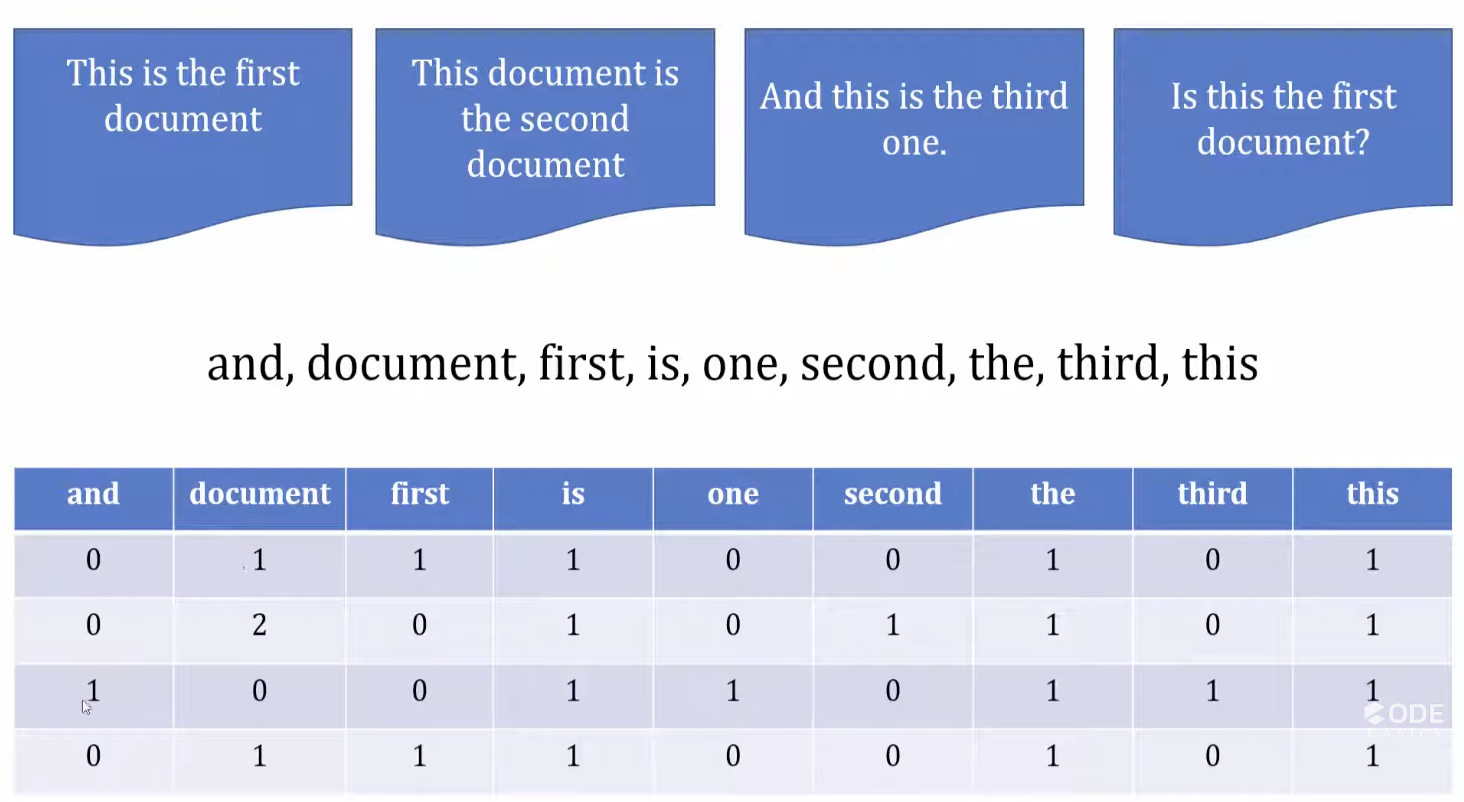

Suppose we have the above four documents, we can find all the unique words in all the documents and treat them as features. We can create the above table where each row corresponds to one document and tells us if that particular word was present in the document or not.

In [138]:
# using the CountVectorizer method to convert Message text to numerical data
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Naïve Bayes has three types of classifiers:
1. Bernoulli: It assumes that all our features are binary such that they take only two values. 0s can represent that word doesn't occur in document and 1s as word occurs in document.
2. Multinomial: It is used when we have discrete data (eg. movie ratings ranging from 1 to 5 as each rating will have a certain frequency to represent). In text learning, we have the count of each word to predict the class or label.
3. Gaussian: Because of the assumption of normal distribution, Gaussian NB is used in cases when all our features are continuous. For example, in Iris dataset, features are sepal and petal length and sepal and petal width, so its features can have different values in dataset as width and length can vary. We can't represent features in terms of their occurences. This means data is continuous.

In [139]:
# training multinomial Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [140]:
# making predictions
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [141]:
# testing the model
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9856502242152466

Converting the input to CountVectorizer everytime is a hassle. We can use the pipeline to define a set of operations.

In [ ]:
# creating the pipeline and training the model
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

clf.fit(X_train, y_train)

,steps,"[('vectorizer', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
# checking model score
print(clf.score(X_test, y_test))
print(clf.predict(emails))

0.9856502242152466
[0 1]
